 # Multiple-Linear-Regression_50_Startups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

 # Import the Data

In [3]:
startups=pd.read_csv("50_startups.csv")

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startups.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Check for missing values

In [7]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

 # Correlation Matrix

In [8]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


 # Scatterplot between varibles along with histograms

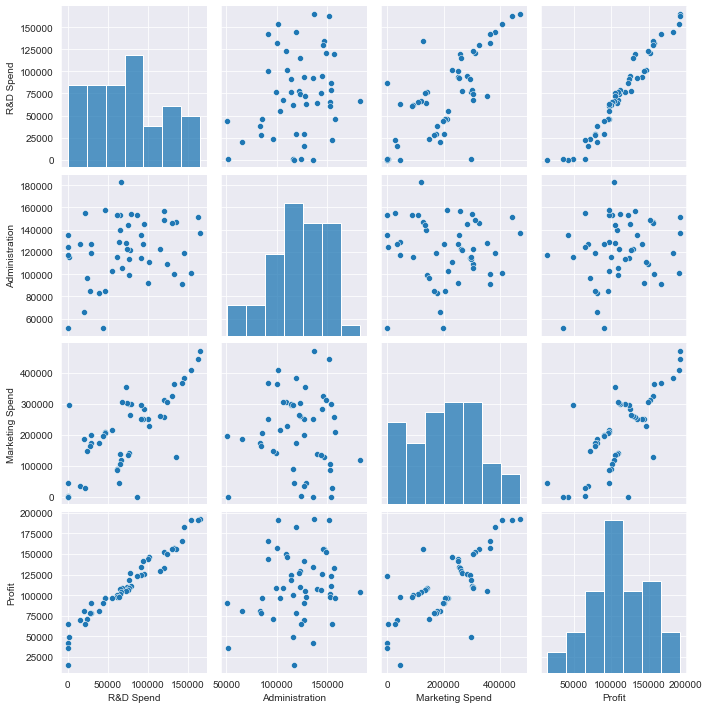

In [9]:
#Format the plot background and scatter plots for all the varibles
sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [10]:
startups = startups.rename(columns={'R&D Spend':'RD','Administration':'Adm','Marketing Spend':'MS'}, inplace=False)

In [11]:
startups.head()

,RD,Adm,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Preparing a Model

In [12]:
import statsmodels.formula.api as smf
model =smf.ols('Profit~RD+Adm+MS', data=startups).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        01:09:22   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
Adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # Simple Linear Regression Model

In [14]:
ml_a=smf.ols('Profit~Adm', data=startups).fit()
#t and p-values
print(ml_a.tvalues,'\n', ml_a.pvalues)
ml_a.summary()

Intercept    3.040044
Adm          1.419493
dtype: float64 
 Intercept    0.003824
Adm          0.162217
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 15 Oct 2021   Prob (F-statistic):              0.162
Time:                        01:09:22   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Adm            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ml_m=smf.ols('Profit~MS', data=startups).fit()
#t and p-values
print(ml_m.tvalues,'\n', ml_m.pvalues)
ml_m.summary()

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           4.38e-10
Time:                        01:09:22   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_am=smf.ols('Profit~Adm+MS', data=startups).fit()
print(ml_am.tvalues,'\n',ml_am.pvalues)
ml_am.summary()

Intercept    1.142741
Adm          2.467779
MS           8.281039
dtype: float64 
 Intercept    2.589341e-01
Adm          1.729198e-02
MS           9.727245e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.50e-10
Time:                        01:09:22   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Adm            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 # Calculating VIF

In [17]:
rsq_RD = smf.ols('RD~Adm+MS',data=startups).fit().rsquared
vif_RD= 1/(1-rsq_RD)

rsq_Adm =smf.ols('Adm~RD+MS', data=startups).fit().rsquared
vif_Adm = 1/(1-rsq_Adm)

rsq_MS =smf.ols('MS~RD+Adm', data=startups).fit().rsquared
vif_MS =1/(1-rsq_MS)

#Sorting VIF values in a data frame
d1 ={'Variables' :['RD','Adm','MS'],'VIF':[vif_RD,vif_Adm,vif_MS]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,RD,2.468903
1,Adm,1.175091
2,MS,2.326773


 # Residual Analysis
 
## Test for Normality of Residuals (Q-Q Plot)

In [18]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

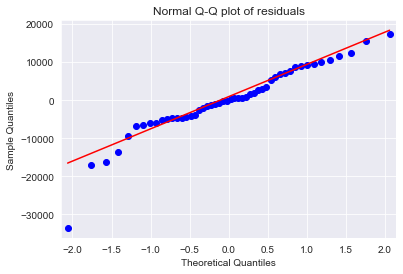

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q') # line=45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list (np.where(model.resid <-30000))

[array([49], dtype=int64)]

 # Residual Plot for Homoscedasticity

In [21]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()


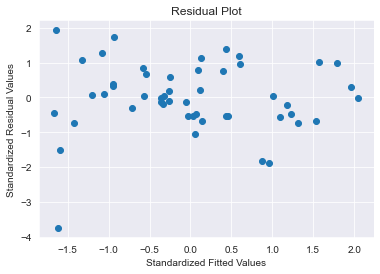

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

 # Residual vs Regressors

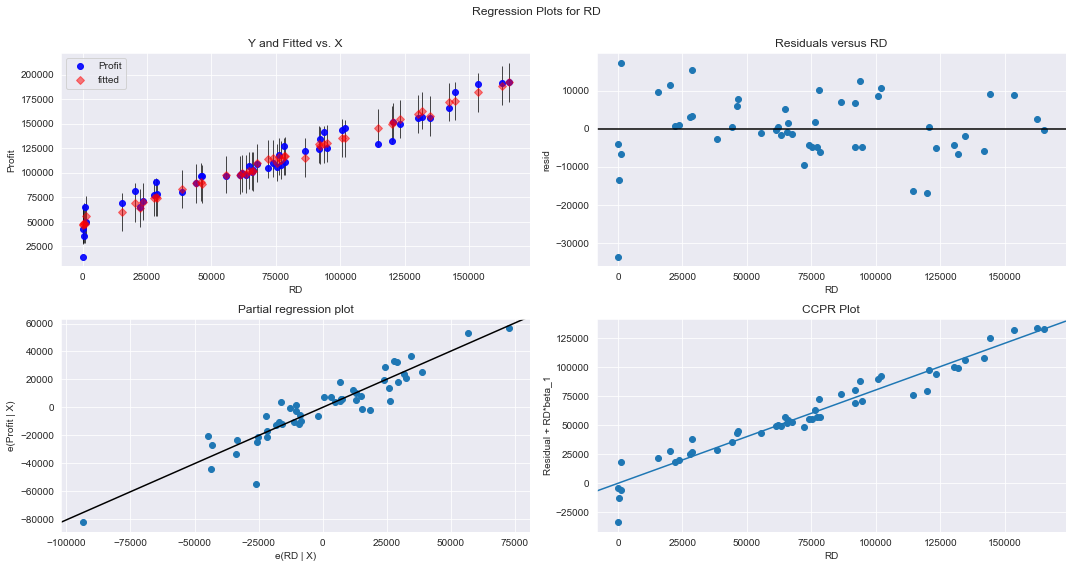

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

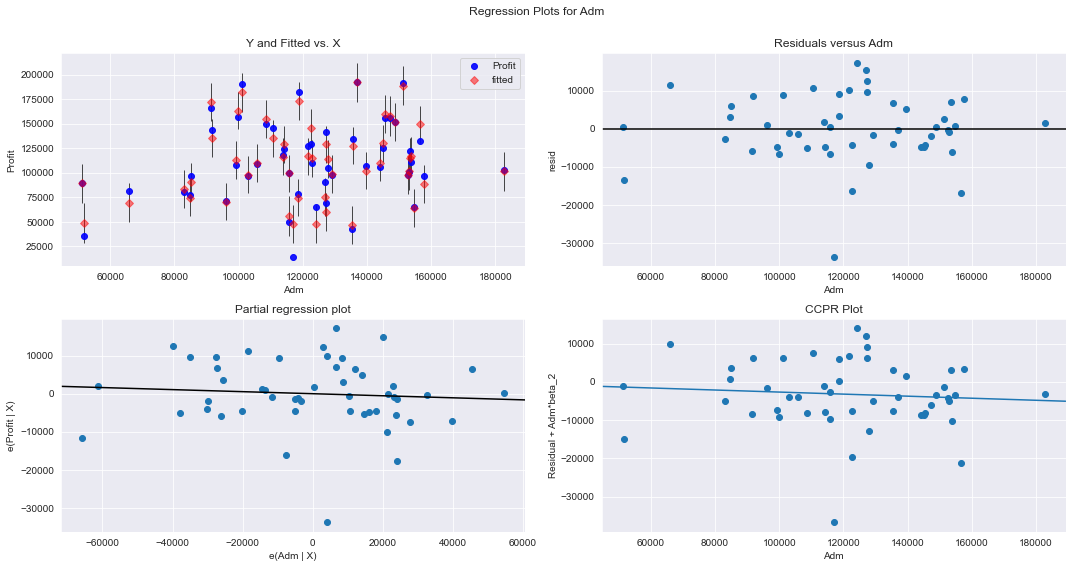

In [24]:
fig =plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Adm", fig=fig)
plt.show()

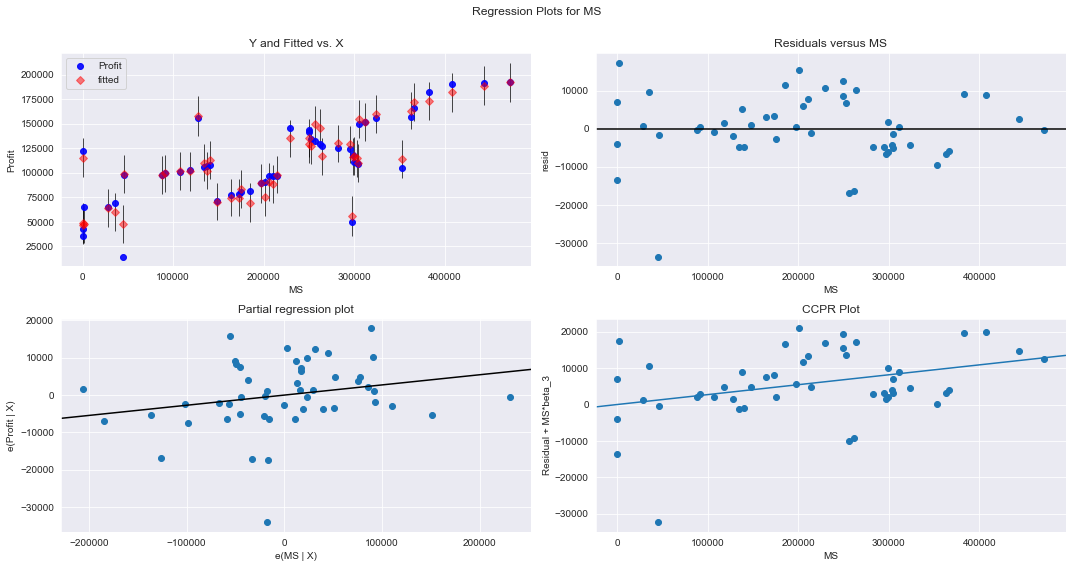

In [25]:
fig = plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

 # Model Deletion Diagnostics
 ## Detecting Influencers/Outliers

 ## Cook's Distance 

In [26]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

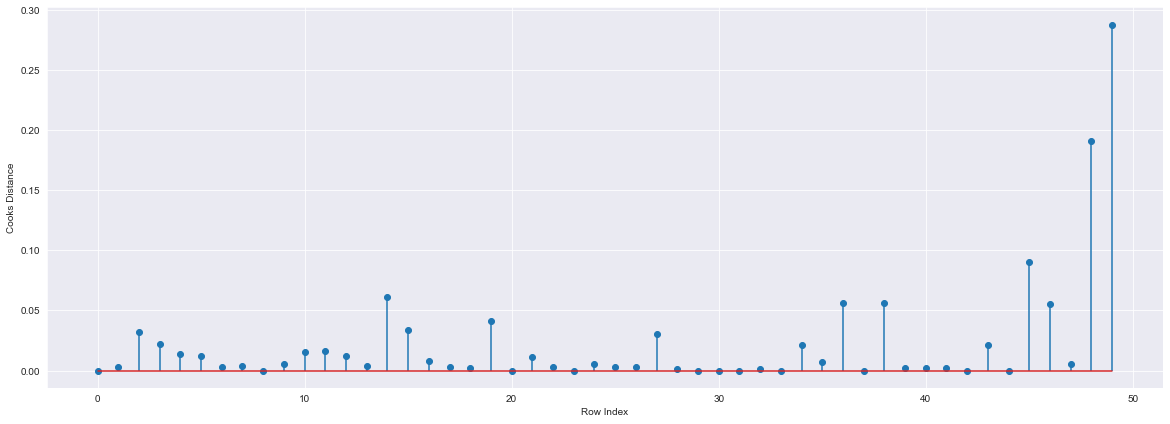

In [27]:
# Plot the influencers values using stem plot
fig = plt.subplots (figsize =(20,7))
plt.stem(np.arange (len(startups)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
# Index and value of Influncer where c is more then .5
(np.argmax(c), np.max(c))

(49, 0.2880822927543263)

 # High Influence Point

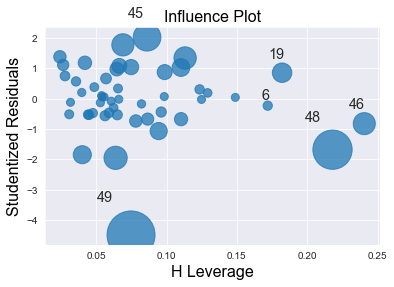

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
startups.shape

(50, 5)

In [31]:
k= startups.shape[1]
n= startups.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

 ### From the above plot, it is evident that data point 49 the Influencers

In [32]:
startups[startups.index.isin([49])]

,RD,Adm,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [33]:
startups.head()

,RD,Adm,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 # Imporving the Model

In [34]:
# Load the data
startups_new = pd.read_csv("50_startups.csv")

In [35]:
# Discard the data points which are Influencers and reasign the row number (reset_index())
startups1=startups_new.drop(startups_new.index[[49]],axis=0).reset_index()
startups1

,index,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


 # Build Model

In [36]:
startups1 =startups1.rename(columns={'R&D Spend':'RD','Marketing Spend':'MS','Administration':'Adm'}, inplace=False)

In [37]:
startups1.head()

,index,RD,Adm,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [38]:
# Exclude variable "Adm" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~RD+MS', data=startups1).fit()
final_ml_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           3.74e-33
Time:                        01:09:26   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RD             0.7754      0.035     22.136      0.000       0.705       0.846
MS             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
(final_ml_M.rsquared, final_ml_M.aic)

(0.9610856807456628, 1018.8564801588338)

In [40]:
# Exclude variable "Adm" and generate R-Squared and AIC values
final_ml_A= smf.ols('Profit~RD+Adm', data=startups1).fit()
final_ml_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           1.69e-32
Time:                        01:09:26   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RD             0.8349      0.026     31.847      0.000       0.782       0.888
Adm           -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
(final_ml_A.rsquared, final_ml_A.aic)

(0.9584519070123048, 1022.0654576388338)

 #### Comparing above R-Squared and AIC values, model final_ml_M has high R-squared low AIC value hence include varible "Marketing Spend" so that Multi Collinearity problem would be resolved.

 # Cook's Distance

In [42]:
model_influence_M = final_ml_M.get_influence()
(c_M, _)=model_influence_M.cooks_distance

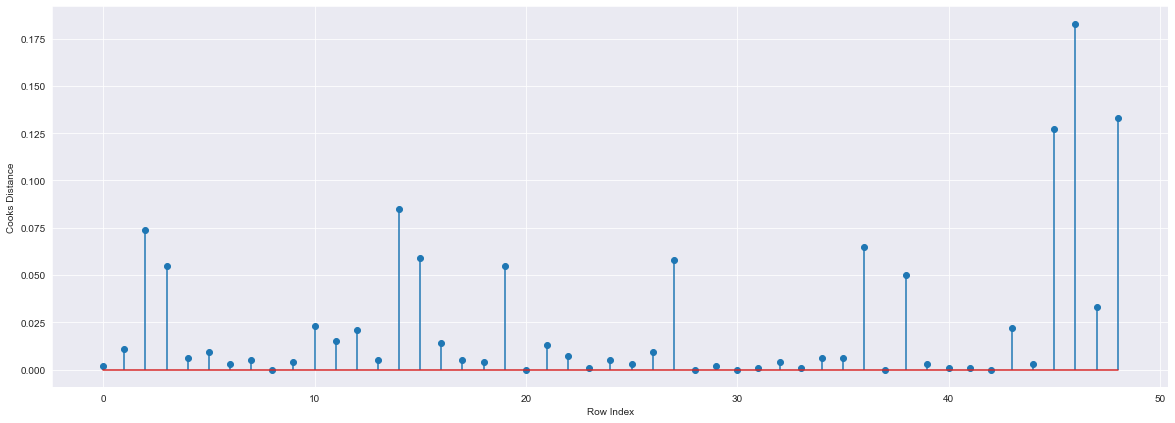

In [43]:
fig =plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups1)), np.round(c_M,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

In [44]:
#Index of the data points where c is more the .5
(np.argmax(c_M),np.max(c_M))

(46, 0.1833755649133868)

 #### Since the value is <1, we can stop the diagnostic process and finalize the model

In [45]:
# Check the accuracy of the model
final_ml_M=smf.ols('Profit~RD+MS', data=startups1).fit()


In [46]:
(final_ml_M.rsquared, final_ml_M.aic)

(0.9610856807456628, 1018.8564801588338)

 # Predicting for new data

In [47]:
startups1.head()

,index,RD,Adm,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [48]:
# New data for prediction
new_data=pd.DataFrame({"RD":100000,"Adm":128718,"MS":238160}, index=[1])
new_data

,RD,Adm,MS
1,100000,128718,238160


In [49]:
final_ml_M.predict(new_data)

1    133860.079028
dtype: float64

In [50]:
final_ml_M.predict(startups1.iloc[0:5,])

0    190942.726927
1    188043.924520
2    179957.312472
3    172246.416164
4    170022.687457
dtype: float64

In [51]:
startups1.head()

,index,RD,Adm,MS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
pred_y = final_ml_M.predict(startups1)

In [53]:
pred_y

0     190942.726927
1     188043.924520
2     179957.312472
3     172246.416164
4     170022.687457
5     161999.405410
6     157669.178690
7     159705.298181
8     151804.380605
9     153787.521922
10    135096.466868
11    134699.049858
12    129422.677987
13    128049.202655
14    149827.450777
15    145769.611357
16    117530.489091
17    130936.300519
18    129020.306206
19    116793.710748
20    117108.281313
21    118793.642939
22    115484.209637
23    110513.437292
24    113382.099441
25    103711.697086
26    111873.132740
27    115389.649335
28    104243.190309
29    103595.167960
30    100355.932697
31     99610.626757
32    100216.309933
33     98705.145163
34     91568.745065
35     91104.335025
36     77530.715090
37     89363.970985
38     70555.662763
39     84485.861451
40     76823.378730
41     75926.972539
42     72178.031523
43     62783.416125
44     67759.192437
45     50613.086380
46     58959.714353
47     49785.269847
48     50205.566671
dtype: float64